In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import tqdm

In [ ]:
def generate_path(G, start_v, path_len):
  path = [start_v]
  v = start_v
  for i in range(path_len):
    v = np.random.choice([n for n in G.neighbors(v)])
    path.append(v)
  return path

In [ ]:
def get_Euler_number(G):
  return G.number_of_edges() - G.number_of_nodes()

In [ ]:
def build_kinetic_graph(N, t, new_t, init_G=None):
  """Return graph with vertices named from 1 to N"""
  if init_G is not None:
    G = init_G
  else:
    G = nx.Graph()
    G.add_nodes_from(range(1, N + 1)) # [1; N]

  delt_t = new_t - t
  edges_to_add = round(delt_t * N / 2.0)
  for i in range(edges_to_add):
    edge_from = random.randint(1, N) # [1; N]
    edge_to = random.randint(1, N - 1) # [1; N] but not equal to edge_from
    if edge_to >= edge_from:
      edge_to += 1
    G.add_edge(edge_from, edge_to, weight=new_t)

  return G

In [ ]:
N = 50
t_list = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

old_t = 0.0
G = None
euler_numbers = []
simple_cycles_numbers = []
components_numbers = []

for t in t_list:
  G = build_kinetic_graph(N, old_t, t, G)
  euler_numbers.append(get_Euler_number(G))
  #simple_cycles_numbers.append(len(list(nx.simple_cycles(G))))
  components_numbers.append(nx.number_connected_components(G))
  old_t = t
  print(t)

0.5
1.0
1.5
2.0
2.5
3.0


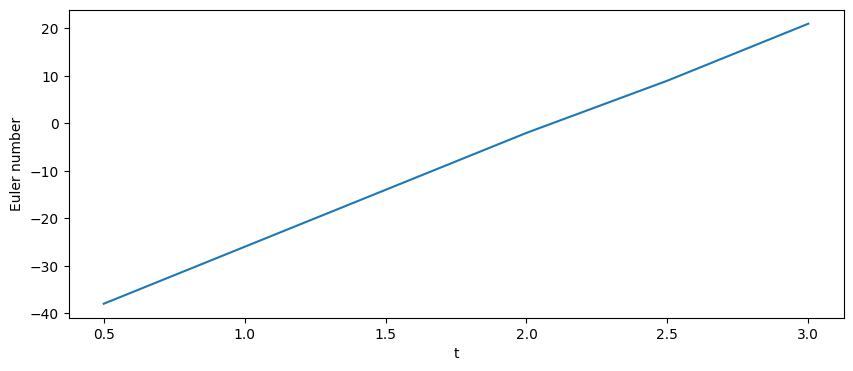

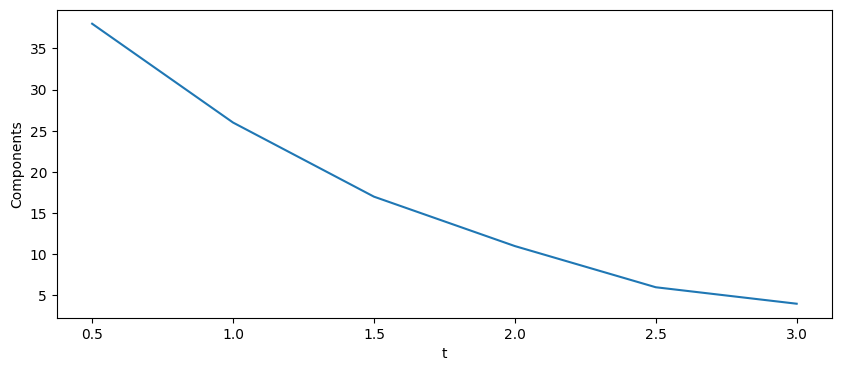

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(t_list, euler_numbers)
plt.ylabel('Euler number')
plt.xlabel('t')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t_list, components_numbers)
plt.ylabel('Components')
plt.xlabel('t')
plt.show()

if len(simple_cycles_numbers) > 0:
  plt.figure(figsize=(10, 4))
  plt.plot(t_list, np.log10(np.array(simple_cycles_numbers) + 1))
  plt.ylabel('log10(Simple cycles + 1)')
  plt.xlabel('t')
  plt.show()

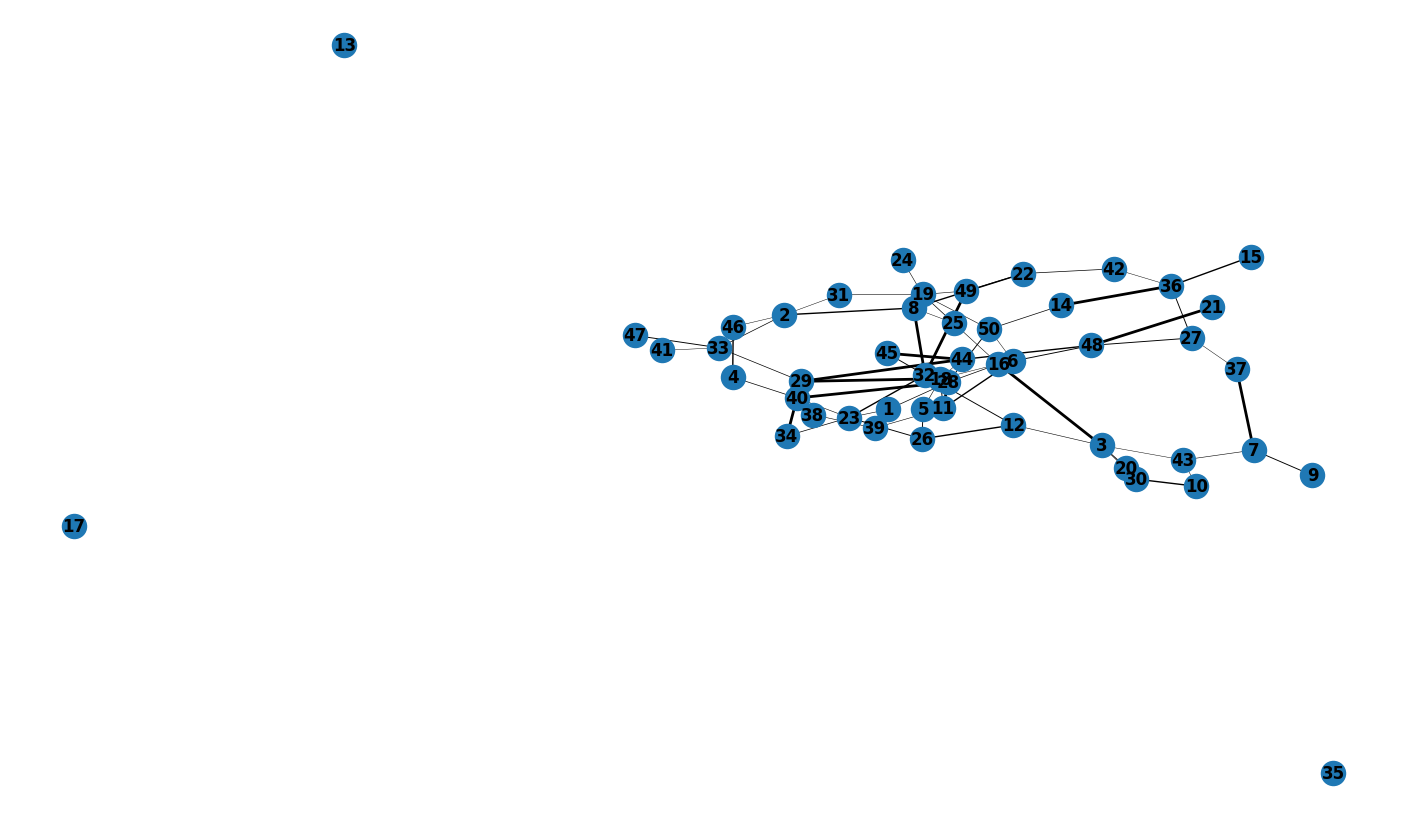

In [ ]:
plt.figure(figsize=(14, 8))
edges = G.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [1.0 / G[u][v]['weight'] for u,v in edges]
nx.draw(G, with_labels=True, font_weight='bold', width=weights)
plt.show()

In [ ]:
generate_path(G, 2, 10)

[2, 31, 19, 25, 19, 25, 19, 24, 19, 50, 14]

In [ ]:
steps = 1000

N = G.number_of_nodes()
start_v = np.random.choice([n for n in G.nodes()])
signal_path = generate_path(G, start_v, steps)

signal_cnt = np.zeros((steps + 1, N + 1))
signal_cnt[0, start_v] = 1

for step in range(1, steps + 1):
  v = signal_path[step]
  signal_cnt[step, :] = signal_cnt[step - 1, :]
  signal_cnt[step, v] += 1

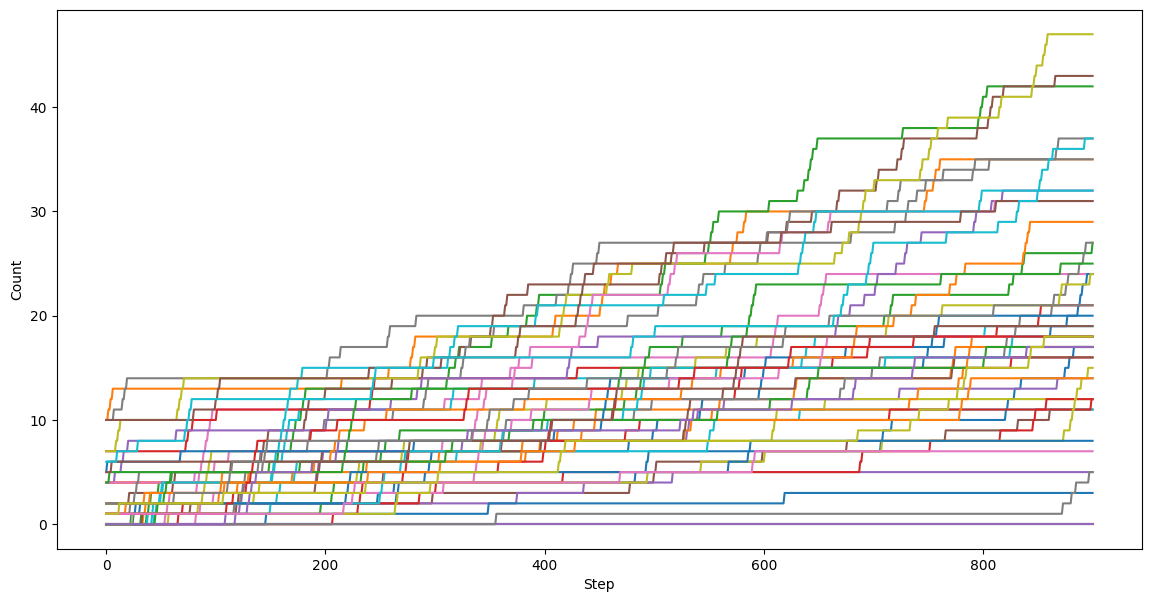

In [ ]:
plt.figure(figsize=(14, 7))

for node in range(1, N + 1):
  plt.plot(signal_cnt[100:, node])
plt.ylabel('Count')
plt.xlabel('Step')
plt.show()

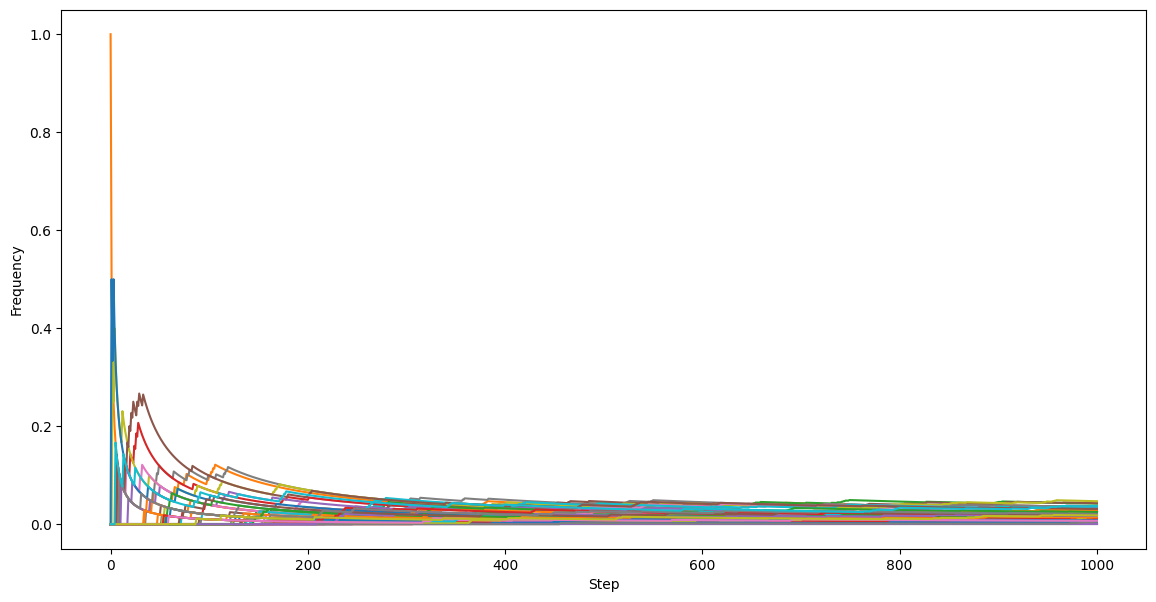

In [ ]:
plt.figure(figsize=(14, 7))
plot_values = signal_cnt.copy()
for step in range(0, steps + 1):
  plot_values[step, :] /= step + 1

for node in range(1, N + 1):
    plt.plot(plot_values[:, node])
plt.ylabel('Frequency')
plt.xlabel('Step')
plt.show()

In [ ]:
for kek in range(5, 1, -1):
  print(kek)

5
4
3
2


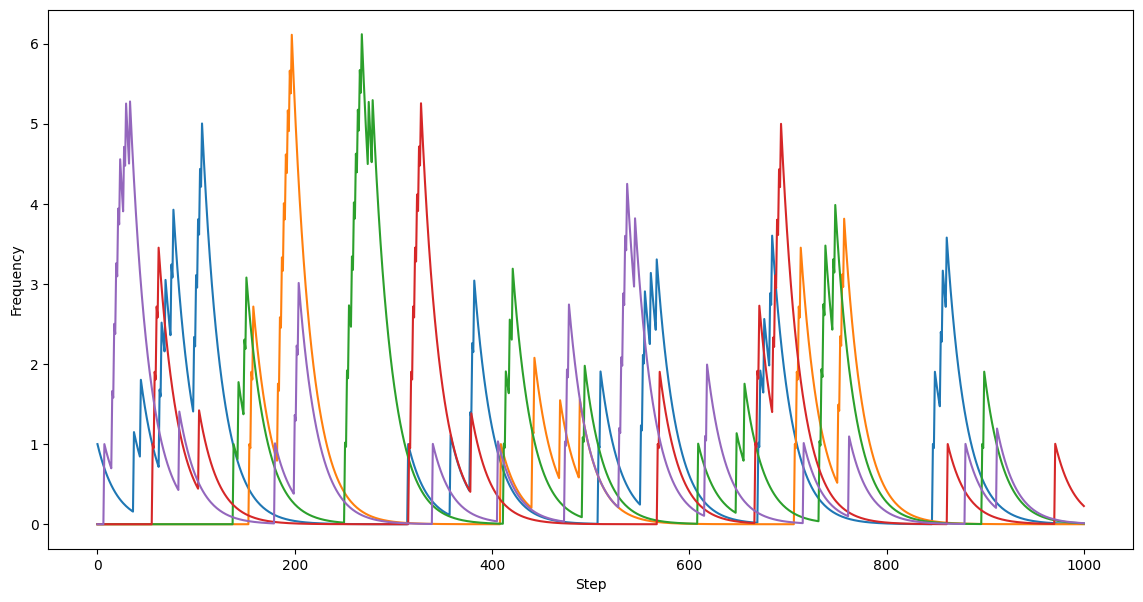

In [ ]:
plt.figure(figsize=(14, 7))
save_values = signal_cnt.copy()

signal_cnt = np.zeros((steps + 1, N + 1))
signal_cnt[0, start_v] = 1
for step in range(1, steps + 1):
  v = signal_path[step]
  signal_cnt[step, :] = signal_cnt[step - 1, :] * 0.95
  signal_cnt[step, v] += 1

for node in range(1, N + 1):
  if max(signal_cnt[:, node]) > 5:
    plt.plot(signal_cnt[:, node])
plt.ylabel('Frequency')
plt.xlabel('Step')
plt.show()

Создаем граф, начиная с одной вершины, далее добавляем N вершин последовательно в цикле и на каждом шаге случайно соединяем две вершины в графе. N max = 100, поскольку в рамках эксперимента нужно было считать количество простых циклов, это долго.

In [ ]:
G = nx.Graph()  # создаём объект графа

N = 100
E = []
nodes = []
edges = []
SC = []
for i in range(1, 2):
  nodes.append(i)
G.add_nodes_from(nodes)
for i in tqdm.tqdm(range(2, N)):
  pair = (random.randint(1, i + 1), random.randint(1, i + 1))
  G.add_node(i)
  G.add_edges_from([pair])
  edges.append(pair)
  E.append(G.number_of_edges() - G.number_of_nodes())
  SC.append(len(list(nx.simple_cycles(G))))

100%|██████████| 98/98 [06:48<00:00,  4.17s/it]


In [ ]:
#nodes

In [ ]:
#edges

In [ ]:
#E

In [ ]:
#SC

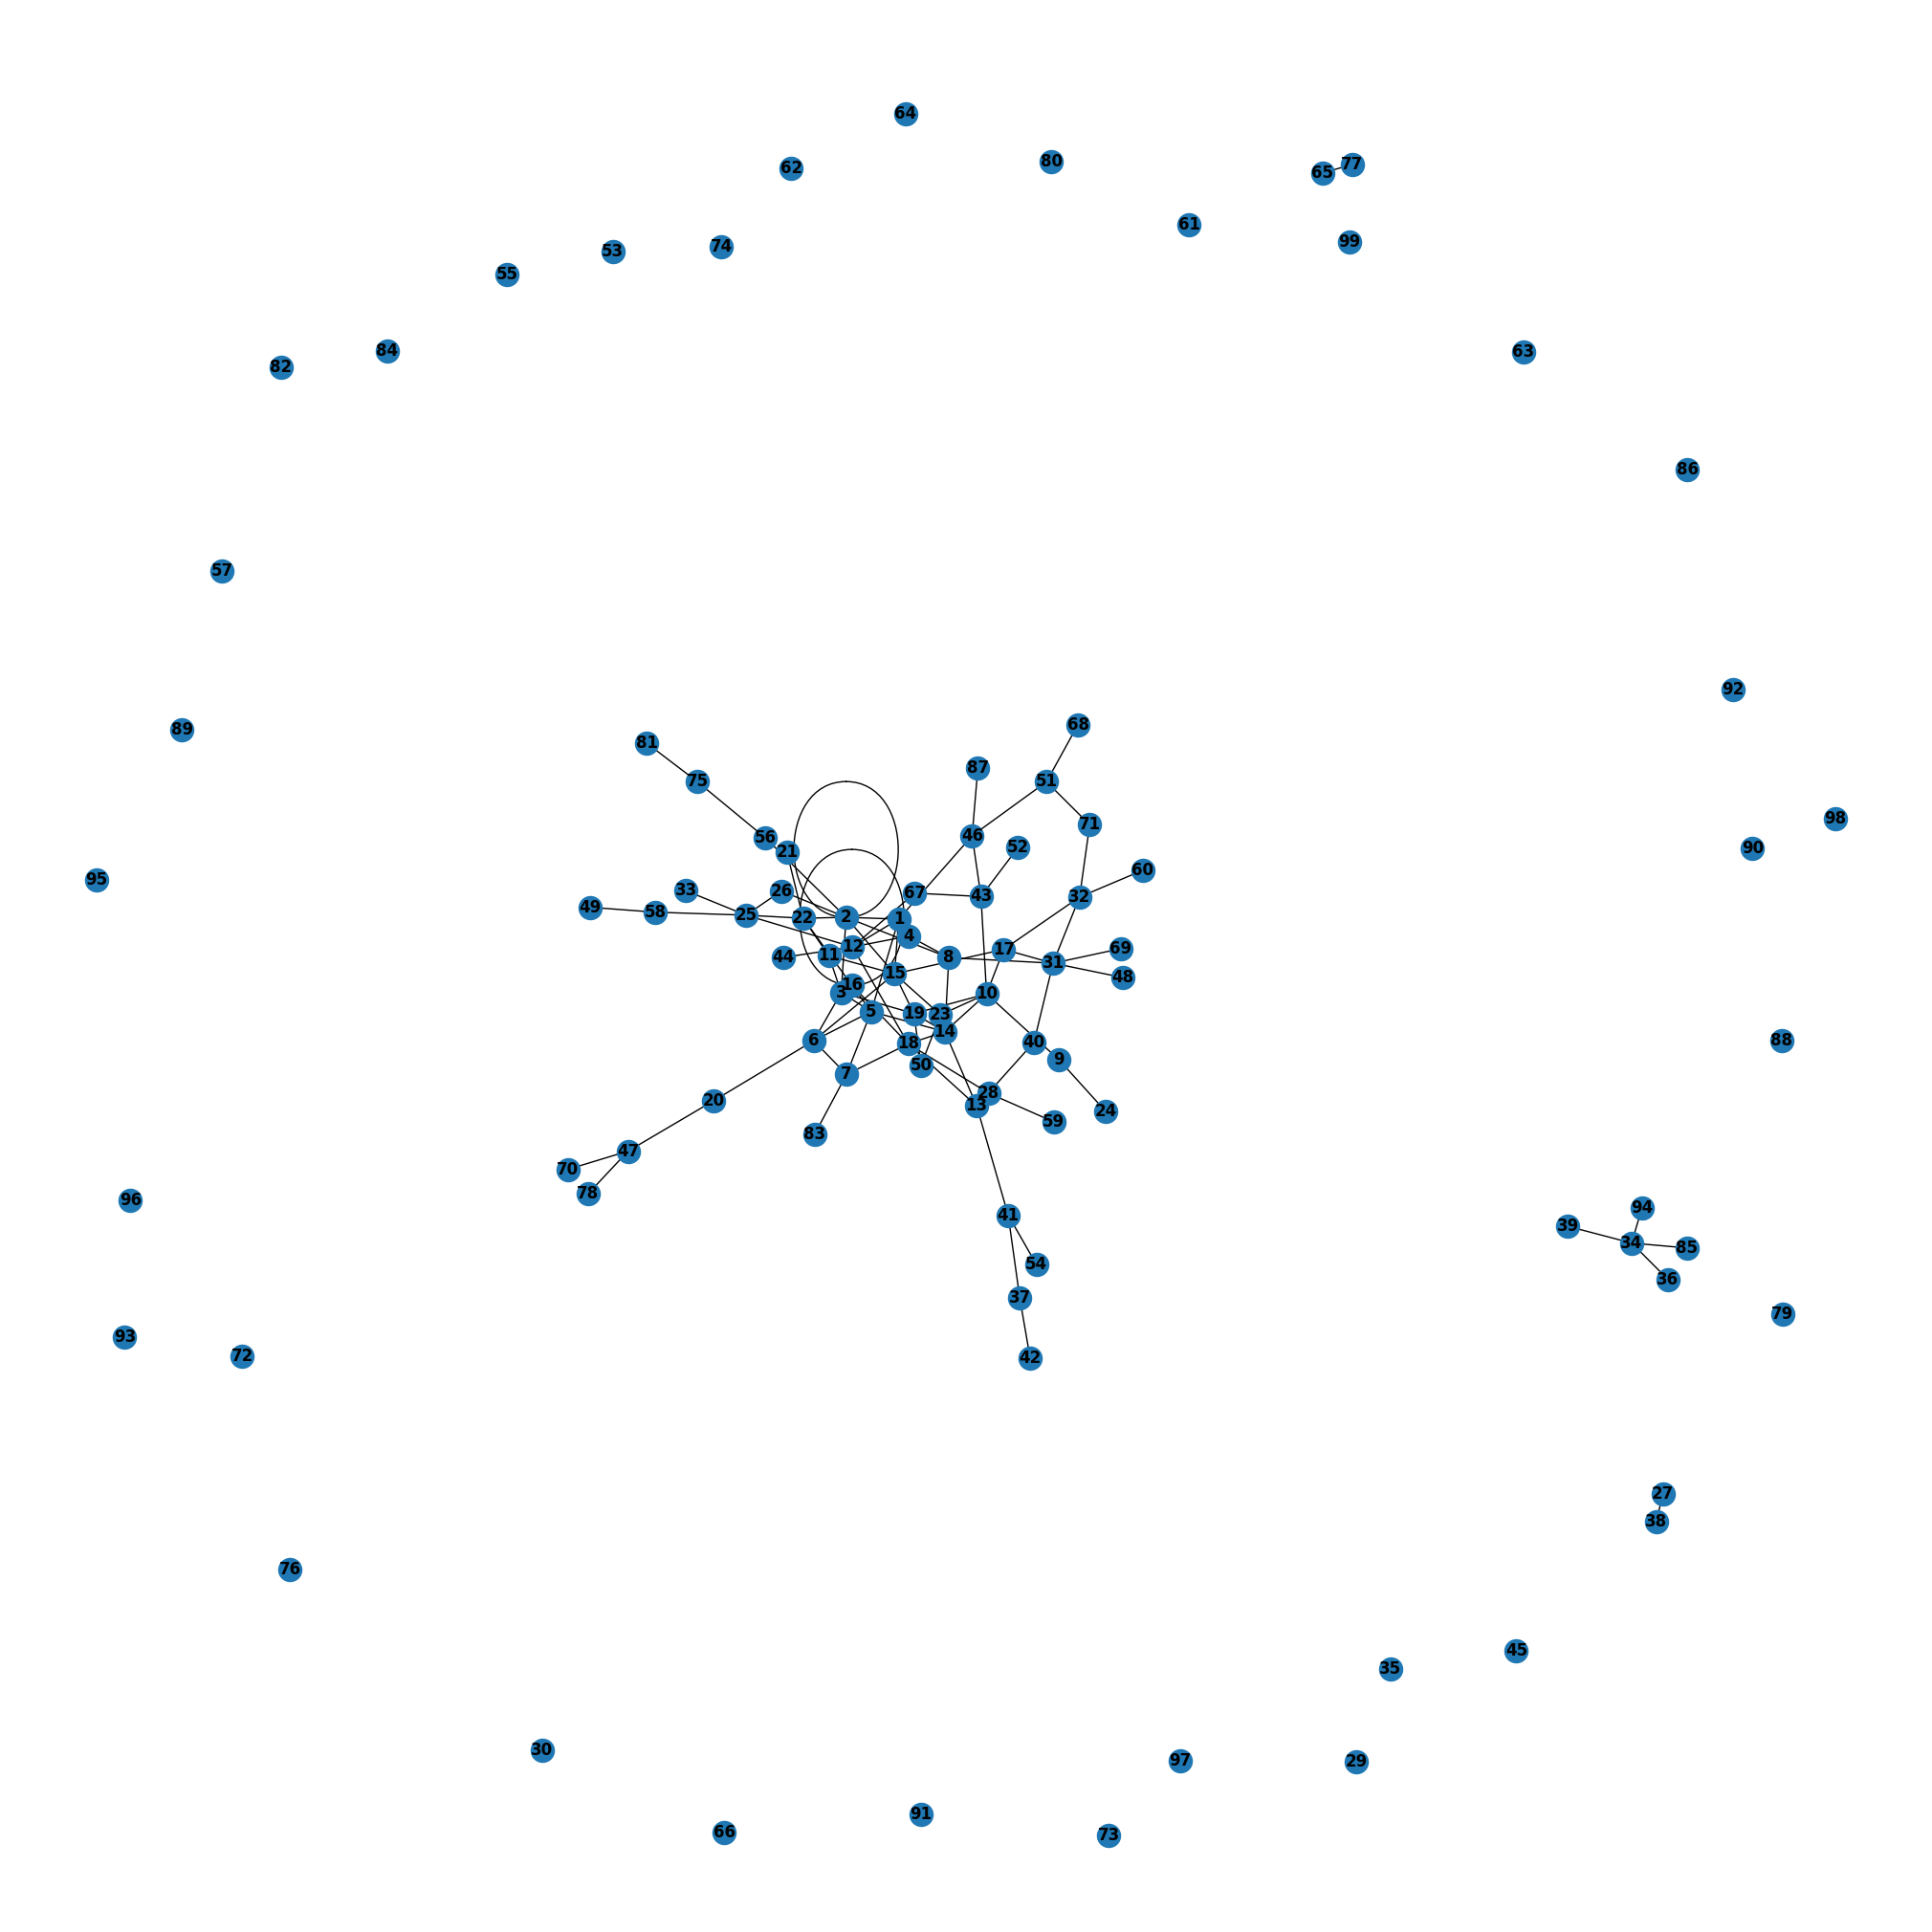

In [ ]:
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

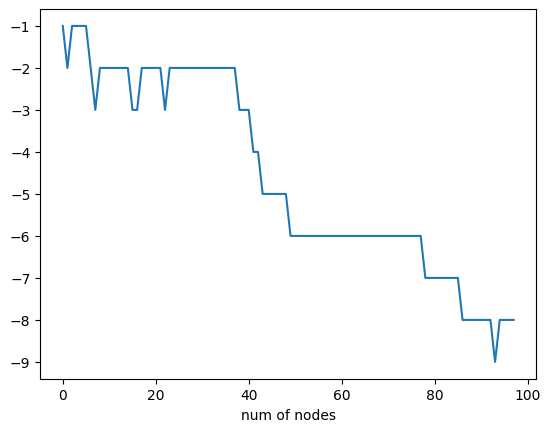

In [ ]:
plt.plot(E)
plt.xlabel('num of nodes')
plt.show()

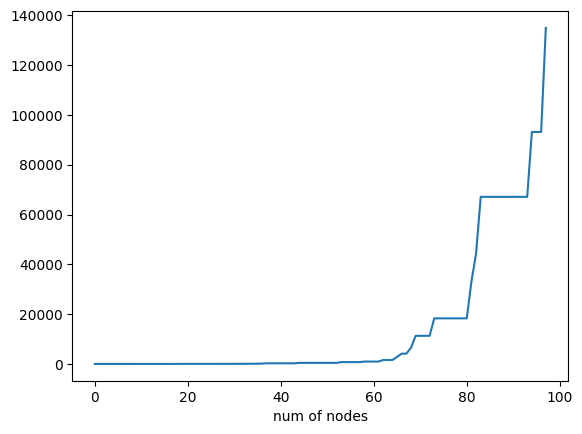

In [ ]:
plt.plot(SC)
plt.xlabel('num of nodes')
plt.show()

Число Эйлера уменьшается. При добавлении вершины будем случайно соединять ее с любой другой вершиной в графе. Не будем считать число простых циклом. Построим граф.

In [ ]:
G = nx.Graph()  # создаём объект графа

N = 15
E = []
nodes = []
edges = []
for i in range(1, 2):
  nodes.append(i)
G.add_nodes_from(nodes)
for i in tqdm.tqdm(range(2, N)):
  pair = (random.randint(1, i - 1), i)
  G.add_node(i)
  G.add_edges_from([pair])
  edges.append(pair)
  E.append(G.number_of_edges() - G.number_of_nodes())

100%|██████████| 13/13 [00:00<00:00, 5398.07it/s]


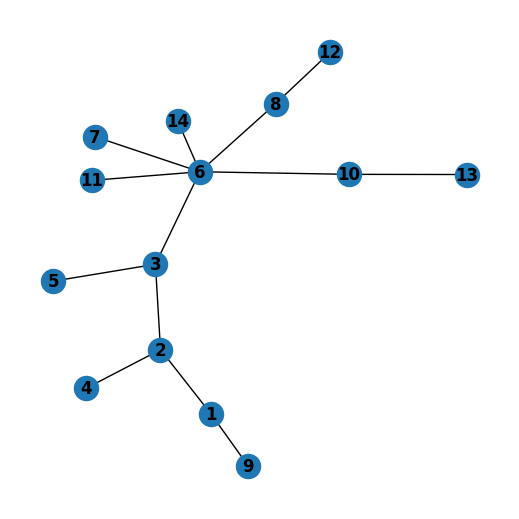

In [ ]:
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [ ]:
generate_path(G, 1, 10)

[1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 3]

In [ ]:
G = nx.Graph()  # создаём объект графа

N = 100
E = []
nodes = []
edges = []
for i in range(1, 2):
  nodes.append(i)
G.add_nodes_from(nodes)
for i in tqdm.tqdm(range(2, N)):
  pair = (random.randint(1, i - 1), i)
  G.add_node(i)
  G.add_edges_from([pair])
  edges.append(pair)
  E.append(G.number_of_edges() - G.number_of_nodes())

100%|██████████| 98/98 [00:00<00:00, 22493.26it/s]


In [ ]:
for i in range(N//2):
  pair = (random.randint(1, N), random.randint(1, N))
  G.add_edges_from([pair])
G.number_of_edges() - G.number_of_nodes()

97

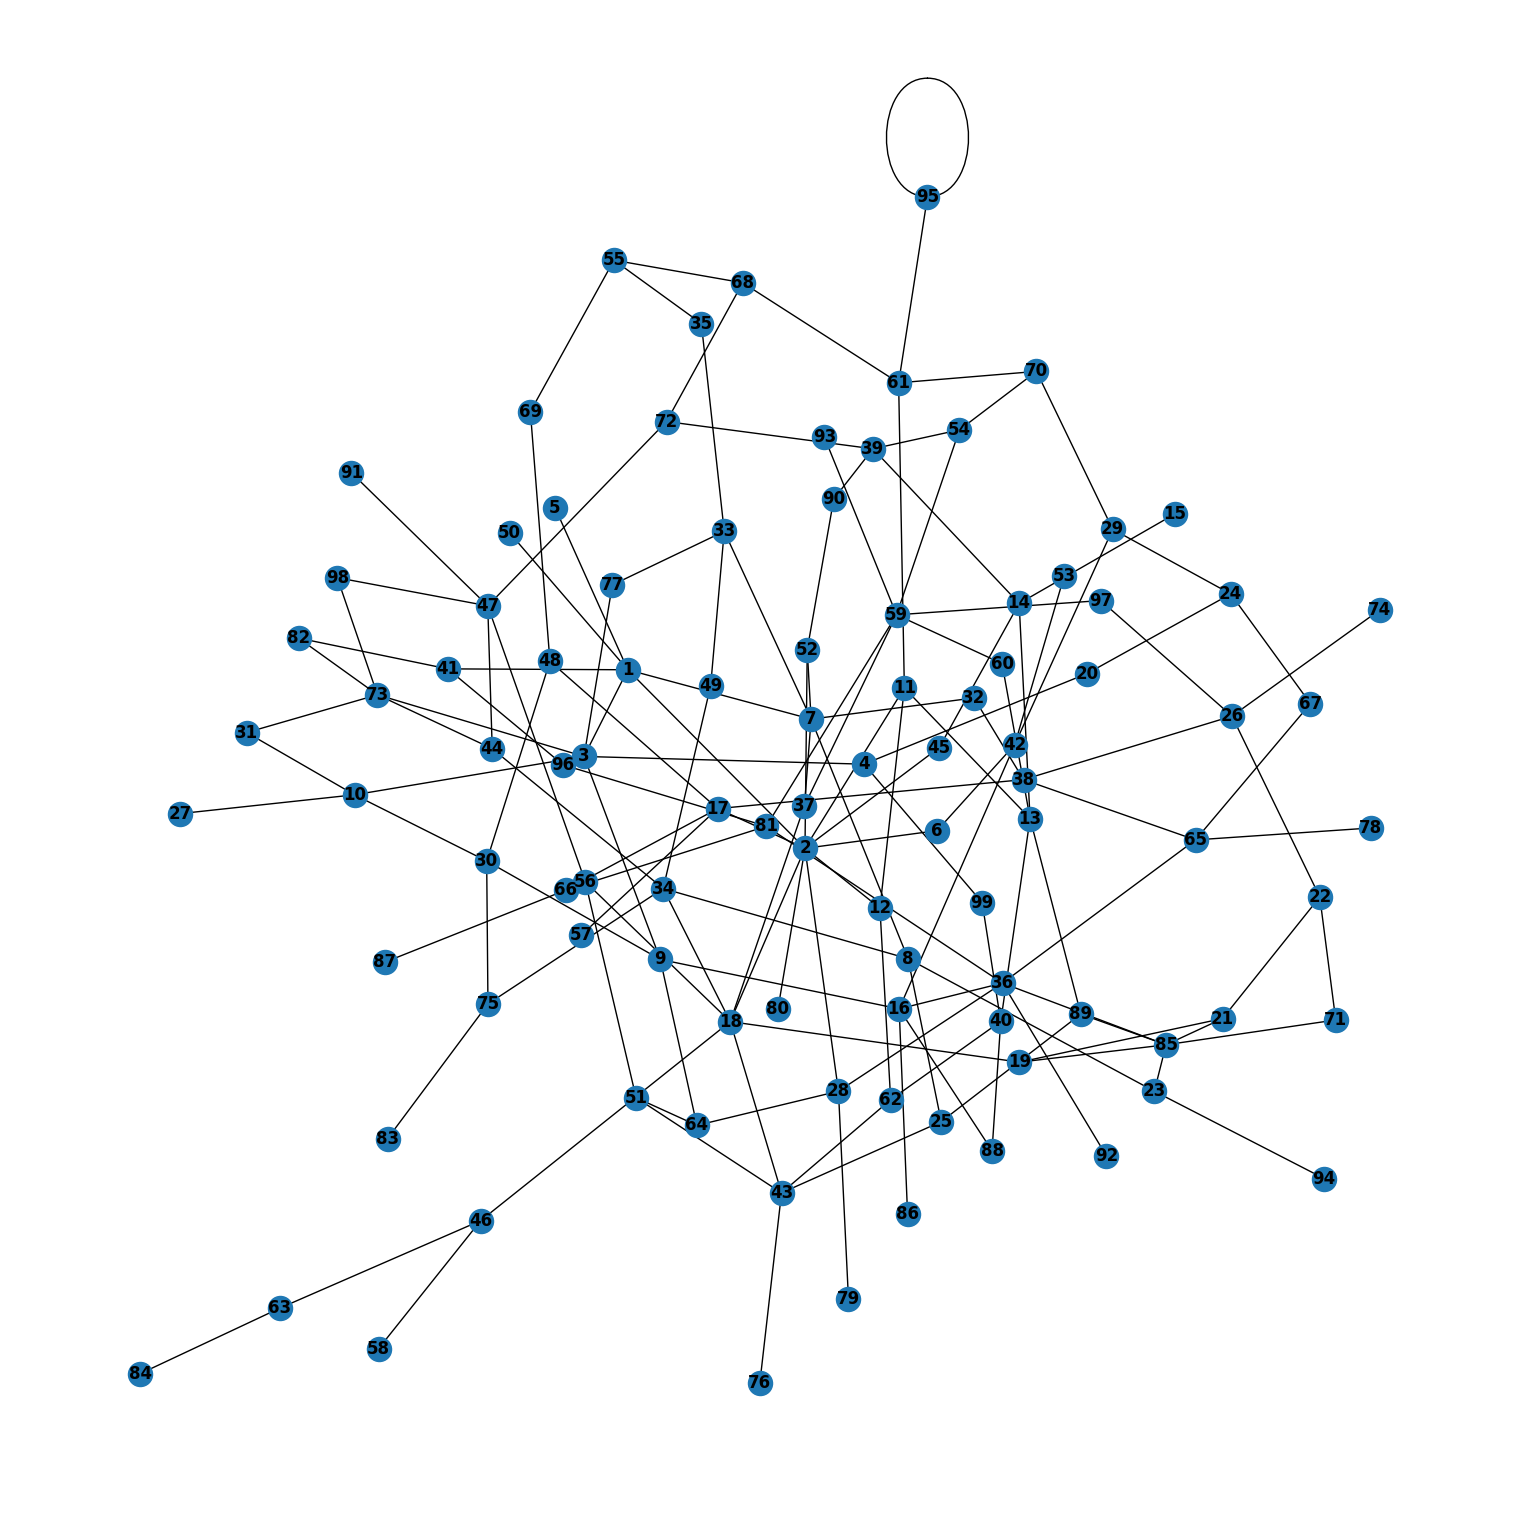

In [ ]:
plt.figure(figsize=(15, 15))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

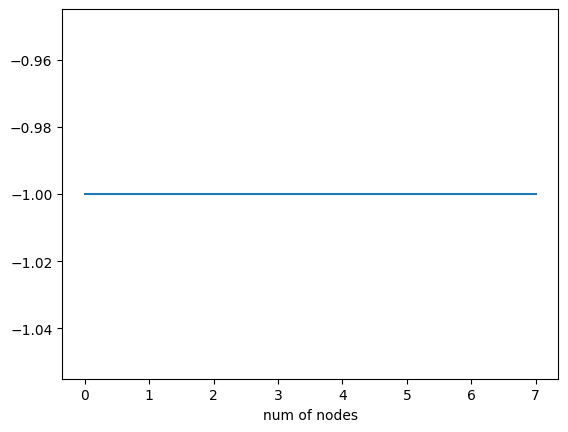

In [ ]:
plt.plot(E)
plt.xlabel('num of nodes')
plt.show()

In [ ]:
G = nx.Graph()  # создаём объект графа

N = 1000
E = []
nodes = []
edges = []
for i in range(1, 2):
  nodes.append(i)
G.add_nodes_from(nodes)
for i in tqdm.tqdm(range(2, N)):
  pair = (random.randint(1, i - 1), i)
  G.add_node(i)
  G.add_edges_from([pair])
  edges.append(pair)
  E.append(G.number_of_edges() - G.number_of_nodes())

100%|██████████| 998/998 [00:00<00:00, 6656.42it/s]


In [ ]:
for i in range(N//2):
  pair = (random.randint(1, N), random.randint(1, N))
  G.add_edges_from([pair])
G.number_of_edges() - G.number_of_nodes()

497

Реализуем алгоритм, где с добавлением вершины к графу, вершина может не соединиться ребром дугой вершиной, а получить петлю.

In [ ]:
G = nx.Graph()  # создаём объект графа

N = 10
E = []
nodes = []
edges = []
for i in range(1, 2):
  nodes.append(i)
G.add_nodes_from(nodes)
for i in tqdm.tqdm(range(2, N)):
  pair = (random.randint(1, i), i)
  G.add_node(i)
  G.add_edges_from([pair])
  edges.append(pair)
  E.append(G.number_of_edges() - G.number_of_nodes())

100%|██████████| 8/8 [00:00<00:00, 6109.69it/s]


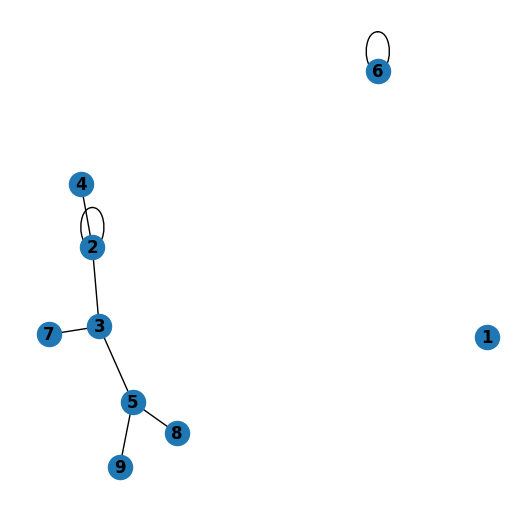

In [ ]:
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [ ]:
G = nx.Graph()  # создаём объект графа

N = 100
E = []
nodes = []
edges = []
for i in range(1, 2):
  nodes.append(i)
G.add_nodes_from(nodes)
for i in tqdm.tqdm(range(2, N)):
  pair = (random.randint(1, i), i)
  G.add_node(i)
  G.add_edges_from([pair])
  edges.append(pair)
  E.append(G.number_of_edges() - G.number_of_nodes())

100%|██████████| 98/98 [00:00<00:00, 23032.71it/s]


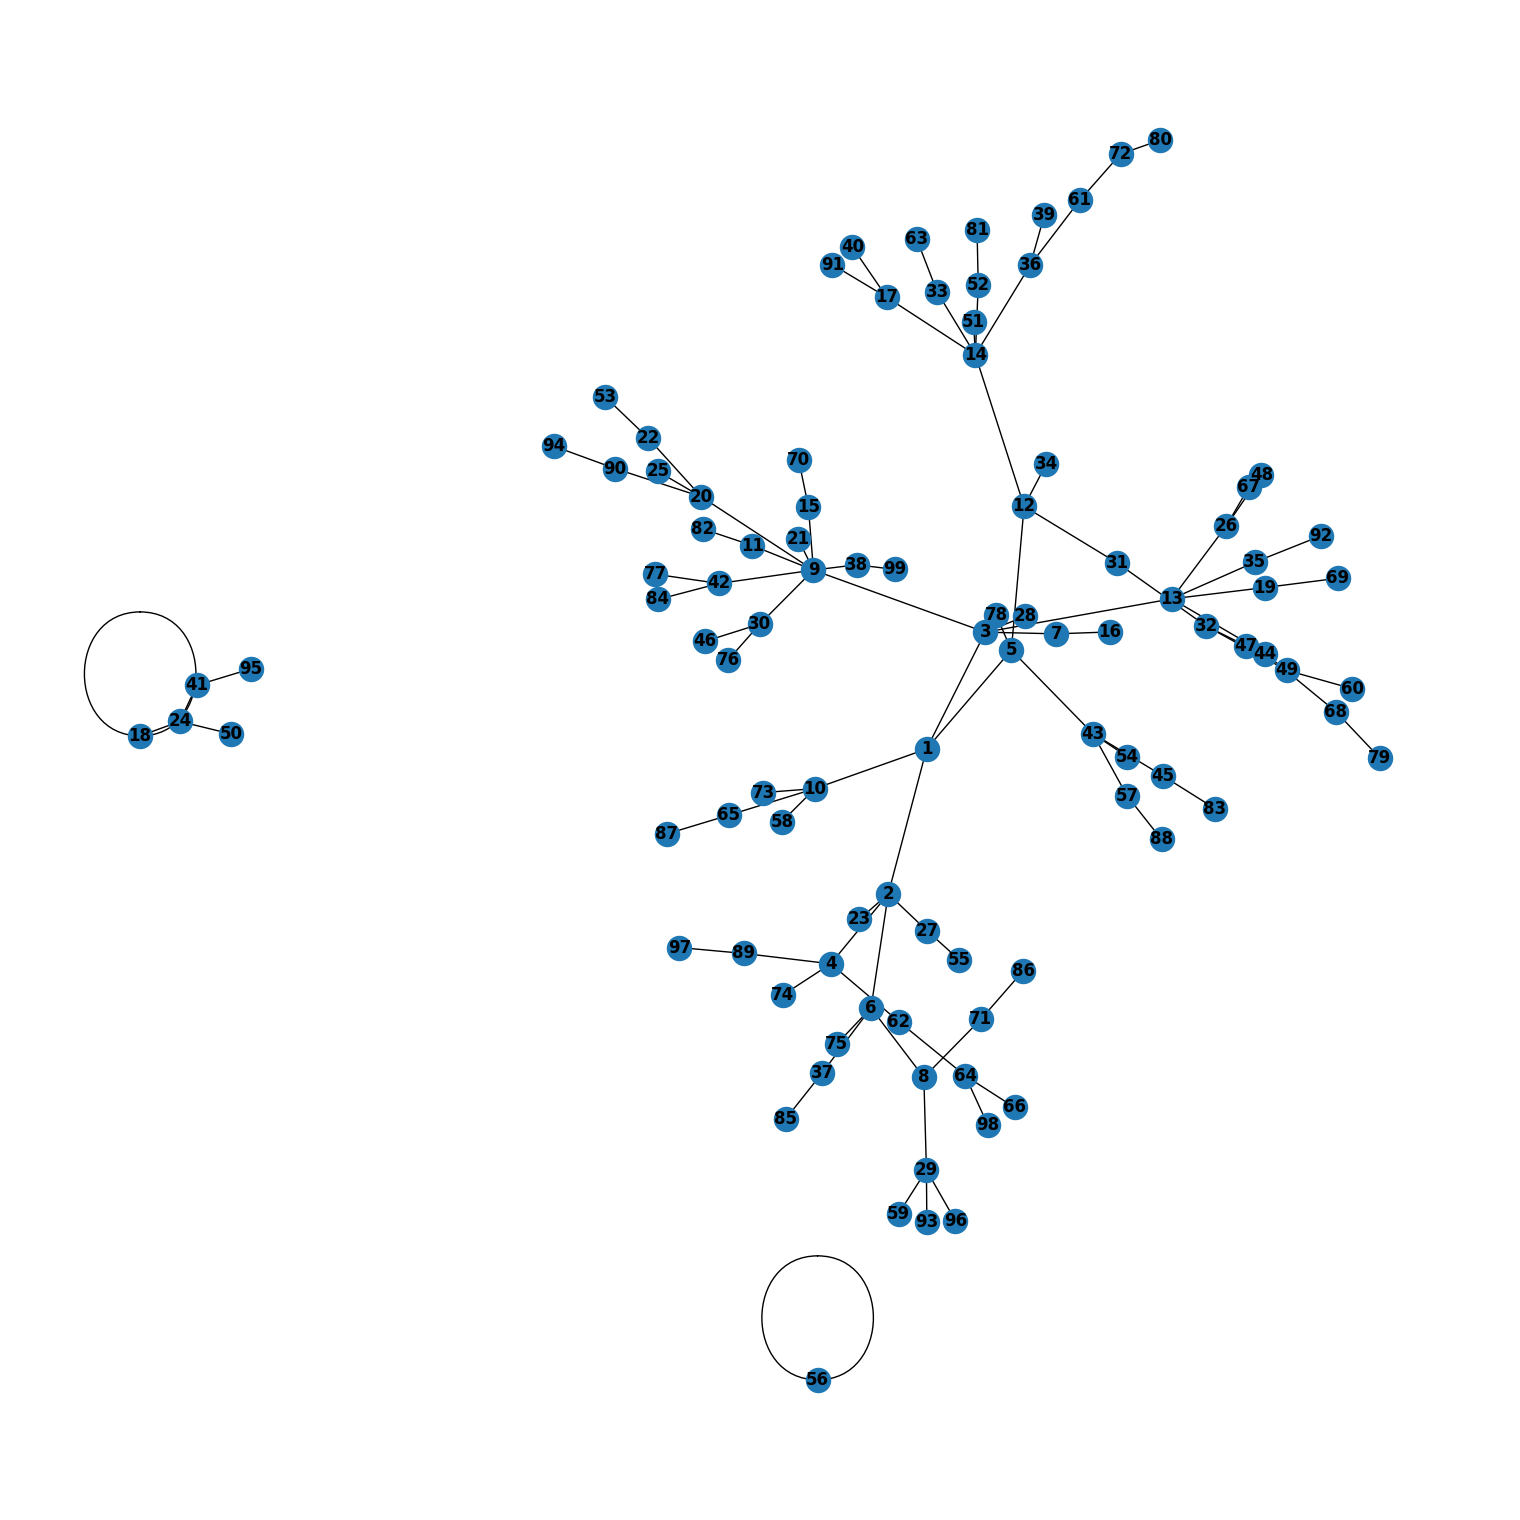

In [ ]:
plt.figure(figsize=(15, 15))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

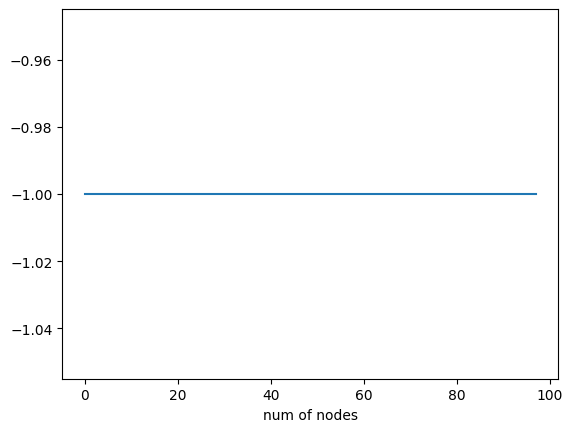

In [ ]:
plt.plot(E)
plt.xlabel('num of nodes')
plt.show()